 <img src="https://yardnyc.com/wp-content/uploads/2018/09/YARD_SITE_2018_NEWS_HERO_FORBES_092318.jpg" alt="New York Landscape" style="width:600px;height:300px;">

# Purchase recommendation for real estate in New York
### Where should you purchase your next house in New York? Unsupervised clustering and statistical regression analysis.

### Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
<ul>
<li>1.1 <a href="#Introduction">Introduction</a>  </li>

<li>2.1 <a href="#ETL">Data ETL Process</a></li>

<li>3.1 <a href="#item3">NYC House sales data</a> </li>

<li>3.2 <a href="#item4">Descriptive analysis for NYC House sales data</a></li>

<li>4.1 <a href="#item5">Regression</a></li>
    
<li>5.1 <a href="#item5">Clustering</a></li>

<li>6.1 <a href="#item5">Conclusion</a></li>
</ul>
    </font>
    </div>

### <a id="Introduction"> </a> 1.1 Introduction
Considering the various expensive house prices in the different neighborhood and boroughs of New York, a careful analysis of current house prices as well as future house market house price prediction are important for consideration when deciding on which house to buy. For this scenario, we will assume the investor is interested in buying residential homes in New York. Specifically, I am interested in analyzing the price of houses in heach neighborhood, amount of houses bought/sold, location analysis, an unsupervised clustering analysis, as well as a regression in order to predict future house value for the prospective neighborhoods.
Machine learning tools such as unsupervised clustering and statistical regression are used in order to identify common neighborhoods and analyze curent and future property prices.

### 1.2 Selection of datasets
I will utilize the following tools and datasets to perform my analysis:
- NYU "2016 New York City Neighborhood Tabulation Areas" GeoJson
- NYC "DOF: Summary of Neighborhood Sales by Neighborhood Citywide by Borough"
- CognitiveClass.ai "newyork_data"

The following libraries and APIs will be utilized to analyze and visualize the data:
Data analysis:
- Pandas
- SkLearn
    - k-means clustering
    - Statistical Regression
- Numpy
Visualization: 
- Folium
- Matplotlib
- Seaborn
Data:
- Foursquare API
- NYC OpenData API

Data analysis tools are chosen in order to effectively read and work with Data Frames, perform mathematical analysis and create Machine Learning models. K-means clustering is used in order to group neighborhoods and possibly identify common available investments amongst different areas. It will prove to be useful in observing alternatives after finding a viable investment in another area. Statistical regression is used in order to predict future neighborhood house prices in order to identify trends and give information regarding future value of the investment.

For visualization, Folium is used for geospatial data analysis and the matplotlib and seaborn libraries are used for graphical analysis of numerical and categorical data.

Lastly, the foursquare and NYC OpenData APIs are queried in order to obtain surrouding venues data and geospatial data respectively.

### <a id="ETL"> </a>  2.1 Data ETL process

First, let's analyze the House Sales by Neighborhood for different boroughs in New York. This information comes from the NYC OpenData API, containing information for house sales between 2010 and 2019. 

In [37]:
# Import the required libraries for data gathering, management, visualization and analysis
import requests # Handle API requests
import json #read json files
import pandas as pd # Analyze dataframe
from pandas.io.json import json_normalize # Transform json into pandas DataFrame
import numpy as np

from sklearn.linear_model import LinearRegression # statistical regression
from sklearn.preprocessing import StandardScaler # Standarization and normalization

import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

import folium # Geographical data visualization
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

### 2.1.1 NYC House sales data

In [38]:
# Get home sales data from NYC OpenDAta API
urlNYC = 'https://data.cityofnewyork.us/resource/5ebm-myj7.json?$limit=50000'
NYC = requests.get(urlNYC).json()
NYC[0:5]

[{'borough': 'MANHATTAN',
  'neighborhood': 'ALPHABET CITY',
  'type_of_home': '01 ONE FAMILY HOMES',
  'number_of_sales': '1',
  'lowest_sale_price': '593362',
  'average_sale_price': '593362',
  'median_sale_price': '593362',
  'highest_sale_price': '593362.00',
  'year': '2010'},
 {'borough': 'MANHATTAN',
  'neighborhood': 'ALPHABET CITY',
  'type_of_home': '02 TWO FAMILY HOMES',
  'number_of_sales': '1',
  'lowest_sale_price': '1320000',
  'average_sale_price': '1320000',
  'median_sale_price': '1320000',
  'highest_sale_price': '1320000.00',
  'year': '2010'},
 {'borough': 'MANHATTAN',
  'neighborhood': 'ALPHABET CITY',
  'type_of_home': '03 THREE FAMILY HOMES',
  'number_of_sales': '1',
  'lowest_sale_price': '900000',
  'average_sale_price': '900000',
  'median_sale_price': '900000',
  'highest_sale_price': '900000.00',
  'year': '2010'},
 {'borough': 'MANHATTAN',
  'neighborhood': 'CHELSEA',
  'type_of_home': '01 ONE FAMILY HOMES',
  'number_of_sales': '2',
  'lowest_sale_price

### NYC "DOF: Summary of Neighborhood Sales by Neighborhood Citywide by Borough"
The following table contains data in 9 categories formatted this way:

***BOROUGH***	
Department of Finance determines the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines.
	
Plain Text
	
***NEIGHBORHOOD***
Department of Finance determines the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines.
	
Plain Text
	
***TYPE OF HOME***	
Total number of properties for that particular borough and neighborhood
	
Plain Text
	
***NUMBER OF SALES***	
Total number of sales for that particular neighborhood
	
Number
	
***LOWEST SALE PRICE***
Lowest sales prices for that particular neighborhood
	
Number
	
***AVERAGE SALE PRICE***
Average sales prices for that particular neighborhood
	
Number
	
***MEDIAN SALE PRICE***	
Median sales prices for that particular neighborhood
	
Number
	
***HIGHEST SALE PRICE***	
Highest sales prices for that particular neighborhood
	
Number
	
***YEAR***	
Year of Summary Report
	
Plain Text
	

In [39]:
# Flatten json into DataFrame
dfNYC = pd.json_normalize(NYC)
dfNYC.head(10)

borough   neighborhood           type_of_home number_of_sales  \
0  MANHATTAN  ALPHABET CITY    01 ONE FAMILY HOMES               1   
1  MANHATTAN  ALPHABET CITY    02 TWO FAMILY HOMES               1   
2  MANHATTAN  ALPHABET CITY  03 THREE FAMILY HOMES               1   
3  MANHATTAN        CHELSEA    01 ONE FAMILY HOMES               2   
4  MANHATTAN        CHELSEA    02 TWO FAMILY HOMES               2   
5  MANHATTAN        CHELSEA  03 THREE FAMILY HOMES               1   
6  MANHATTAN        CLINTON    01 ONE FAMILY HOMES               1   
7  MANHATTAN   EAST VILLAGE    01 ONE FAMILY HOMES               2   
8  MANHATTAN   EAST VILLAGE    02 TWO FAMILY HOMES               2   
9  MANHATTAN   EAST VILLAGE  03 THREE FAMILY HOMES               1   

  lowest_sale_price average_sale_price median_sale_price highest_sale_price  \
0            593362             593362            593362          593362.00   
1           1320000            1320000           1320000         1320000.00   
2            900000             900000            900000          900000.00   
3            500000            2875000           2875000         5250000.00   
4           1306213            2603107           2603107         3900000.00   
5           6400000            6400000           6400000         6400000.00   
6           3850000            3850000           3850000         3850000.00   
7           3100000            5800000           5800000         8500000.00   
8            477500            2738750           2738750         5000000.00   
9           3290000            3290000           3290000         3290000.00   

   year  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010  
5  2010  
6  2010  
7  2010  
8  2010  
9  2010

In [40]:
'The NYC House sales data set contains {} rows and {} columns'.format(dfNYC.shape[0],dfNYC.shape[1])

'The NYC House sales data set contains 5979 rows and 9 columns'

We can see the data has 5979 rows of data, containing information for lowest, average, median and highest sale price per year in each neighborhood. The data also makes a distinction between the type of home: One family, two family and three family homes.  

Let's observe confirm the data types for each column.

In [41]:
dfNYC.dtypes

borough               object
neighborhood          object
type_of_home          object
number_of_sales       object
lowest_sale_price     object
average_sale_price    object
median_sale_price     object
highest_sale_price    object
year                  object
dtype: object

Since all the columns contain object variables, let's transform them do more appropriate data types (As described on the data set category introduction).

In [42]:
numCols = ["number_of_sales","lowest_sale_price","average_sale_price","median_sale_price","highest_sale_price","year"]
dfNYC[numCols]=dfNYC[numCols].apply(pd.to_numeric)
dfNYC.dtypes

borough                object
neighborhood           object
type_of_home           object
number_of_sales         int64
lowest_sale_price       int64
average_sale_price      int64
median_sale_price       int64
highest_sale_price    float64
year                    int64
dtype: object

Now all the data types are correctly converted.

### 2.1.2 Descriptive analysis for NYC House sales data
Now that we have all the data correctly transformed, let's perform some exploratory descriptive analysis of the data set. Our objective is to find any initial patterns and gain insights on the data distribution, characteristics or trends for each neighborhood, borough or type of home as well as yearly trends.

In [43]:
dfNYC.describe(include="all")

borough neighborhood         type_of_home  number_of_sales  \
count       5979         5978                 5979      5979.000000   
unique         5          249                    9              NaN   
top     BROOKLYN    SUNNYSIDE  01 ONE FAMILY HOMES              NaN   
freq        1673           57                 1958              NaN   
mean         NaN          NaN                  NaN        35.560462   
std          NaN          NaN                  NaN        50.761453   
min          NaN          NaN                  NaN         1.000000   
25%          NaN          NaN                  NaN         5.000000   
50%          NaN          NaN                  NaN        16.000000   
75%          NaN          NaN                  NaN        46.000000   
max          NaN          NaN                  NaN       519.000000   

        lowest_sale_price  average_sale_price  median_sale_price  \
count        5.979000e+03        5.979000e+03       5.979000e+03   
unique                NaN                 NaN                NaN   
top                   NaN                 NaN                NaN   
freq                  NaN                 NaN                NaN   
mean         7.129386e+05        1.207115e+06       1.150549e+06   
std          1.509407e+06        1.989597e+06       1.868417e+06   
min          1.500000e+05        1.675000e+05       1.675000e+05   
25%          2.120000e+05        4.535140e+05       4.432500e+05   
50%          2.900000e+05        6.240080e+05       6.115000e+05   
75%          5.000000e+05        9.626070e+05       9.200000e+05   
max          2.689300e+07        2.689300e+07       2.689300e+07   

        highest_sale_price         year  
count         5.979000e+03  5979.000000  
unique                 NaN          NaN  
top                    NaN          NaN  
freq                   NaN          NaN  
mean          2.075933e+06  2014.520990  
std           3.667126e+06     2.860365  
min           1.767500e+05  2010.000000  
25%           7.000000e+05  2012.000000  
50%           9.900000e+05  2015.000000  
75%           1.860000e+06  2017.000000  
max           7.710000e+07  2019.000000

Looking at the "type of home" category, it stands out that there are 9 categories, as these are too many. Let's look at the distribuion of categorical variables.

In [44]:
dfNYC["type_of_home"].value_counts()

01 ONE FAMILY HOMES          1958
02 TWO FAMILY HOMES          1927
03 THREE FAMILY HOMES        1439
01 ONE FAMILY DWELLINGS       221
02 TWO FAMILY DWELLINGS       215
03 THREE FAMILY DWELLINGS     162
01  ONE FAMILY HOMES           23
02  TWO FAMILY HOMES           18
03  THREE FAMILY HOMES         16
Name: type_of_home, dtype: int64

Clearly, "ONE/TWO/THREE FAMILY HOMES" are wrongly labeled with an extra space at the beginning in a couple of rows. Let's fix this.

In [45]:
dfNYC[["type_of_home"]]=dfNYC[["type_of_home"]].replace(["01  ONE FAMILY HOMES","02  TWO FAMILY HOMES","03  THREE FAMILY HOMES"],["01 ONE FAMILY HOMES","02 TWO FAMILY HOMES","03 THREE FAMILY HOMES"])
print(dfNYC["type_of_home"].value_counts())
dfNYC.describe(include="all")

01 ONE FAMILY HOMES          1981
02 TWO FAMILY HOMES          1945
03 THREE FAMILY HOMES        1455
01 ONE FAMILY DWELLINGS       221
02 TWO FAMILY DWELLINGS       215
03 THREE FAMILY DWELLINGS     162
Name: type_of_home, dtype: int64


borough neighborhood         type_of_home  number_of_sales  \
count       5979         5978                 5979      5979.000000   
unique         5          249                    6              NaN   
top     BROOKLYN    SUNNYSIDE  01 ONE FAMILY HOMES              NaN   
freq        1673           57                 1981              NaN   
mean         NaN          NaN                  NaN        35.560462   
std          NaN          NaN                  NaN        50.761453   
min          NaN          NaN                  NaN         1.000000   
25%          NaN          NaN                  NaN         5.000000   
50%          NaN          NaN                  NaN        16.000000   
75%          NaN          NaN                  NaN        46.000000   
max          NaN          NaN                  NaN       519.000000   

        lowest_sale_price  average_sale_price  median_sale_price  \
count        5.979000e+03        5.979000e+03       5.979000e+03   
unique                NaN                 NaN                NaN   
top                   NaN                 NaN                NaN   
freq                  NaN                 NaN                NaN   
mean         7.129386e+05        1.207115e+06       1.150549e+06   
std          1.509407e+06        1.989597e+06       1.868417e+06   
min          1.500000e+05        1.675000e+05       1.675000e+05   
25%          2.120000e+05        4.535140e+05       4.432500e+05   
50%          2.900000e+05        6.240080e+05       6.115000e+05   
75%          5.000000e+05        9.626070e+05       9.200000e+05   
max          2.689300e+07        2.689300e+07       2.689300e+07   

        highest_sale_price         year  
count         5.979000e+03  5979.000000  
unique                 NaN          NaN  
top                    NaN          NaN  
freq                   NaN          NaN  
mean          2.075933e+06  2014.520990  
std           3.667126e+06     2.860365  
min           1.767500e+05  2010.000000  
25%           7.000000e+05  2012.000000  
50%           9.900000e+05  2015.000000  
75%           1.860000e+06  2017.000000  
max           7.710000e+07  2019.000000

From this, we can observe that we have information from 5 different boroughs, 249 unique neighborhoods, 6 types of home. Additionally, we can see that the average sale price for all homes is *1,207,115 USD* with an average of *35.5* house sales for all years.  

Let's look at the data visually and try to get more insights on each borough, neighborhood and type of home.

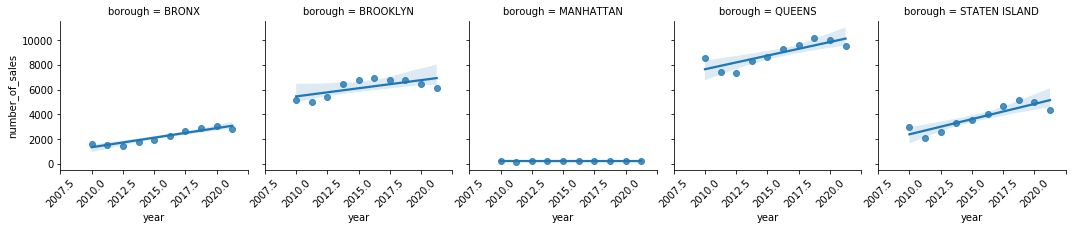

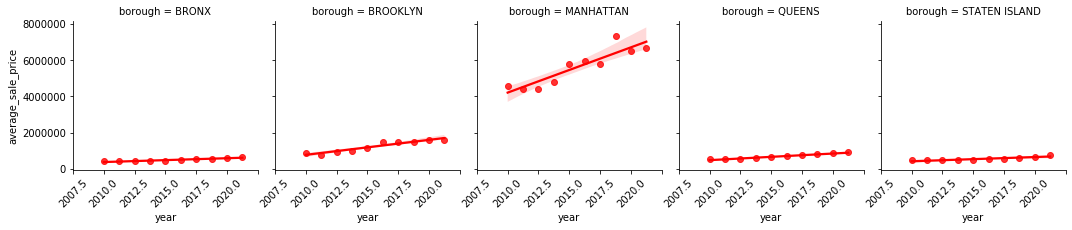

In [46]:
boroughNYC = dfNYC[["borough","neighborhood","type_of_home","number_of_sales","year"]].groupby(["borough","year"],as_index=False).sum()

boroughNYC2 = dfNYC[["borough","neighborhood","type_of_home","average_sale_price","year"]].groupby(["borough","year"],as_index=False).mean()
boroughNYC=boroughNYC.merge(boroughNYC2)

grid = sns.FacetGrid(boroughNYC, col="borough")
grid2 = sns.FacetGrid(boroughNYC, col="borough")

grid.map(sns.regplot, "year", "number_of_sales")
grid2.map(sns.regplot, "year", "average_sale_price",color="red")

grid.set_xticklabels(rotation=45)
grid2.set_xticklabels(rotation=45)
plt.show()

###### Correlation coefficients for the NYC dataset by borough

In [47]:
for borough in boroughNYC.borough.unique():
    print("Borough: ", borough)
    print(boroughNYC[boroughNYC["borough"]==borough].corr().round(2),"\n")


Borough:  BRONX
                    year  number_of_sales  average_sale_price
year                1.00             0.94                0.95
number_of_sales     0.94             1.00                0.93
average_sale_price  0.95             0.93                1.00 

Borough:  BROOKLYN
                    year  number_of_sales  average_sale_price
year                1.00             0.67                0.96
number_of_sales     0.67             1.00                0.74
average_sale_price  0.96             0.74                1.00 

Borough:  MANHATTAN
                    year  number_of_sales  average_sale_price
year                1.00            -0.04                0.91
number_of_sales    -0.04             1.00               -0.15
average_sale_price  0.91            -0.15                1.00 

Borough:  QUEENS
                    year  number_of_sales  average_sale_price
year                1.00             0.84                0.98
number_of_sales     0.84             1.00             

As we can see, Manhattan has significantly less house sales than the other boroughs, being Queens and Brooklin the ones with the most amount of house sales. This seems to inversely match with the average price of each house sale, indicating that a possible driver for the amount of sales is their expensive price.
Additionaly, it is clear that house prices and sales are on an increasing trend from 2010 as indicated both visually and thorugh correlations. A time period analysis of prices and sales seems to be relevant.  
Looking at Manhattan, there is a strong positive correlation between sale price and year, however, the number of sales is not correlated with time.  

Let's perform a simmilar analysis but considering the different home type subcategories.

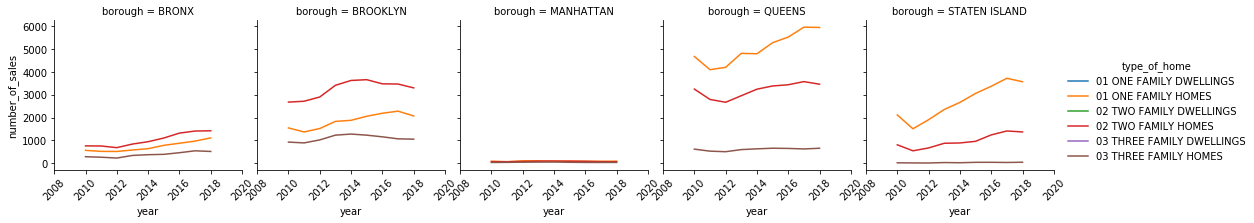

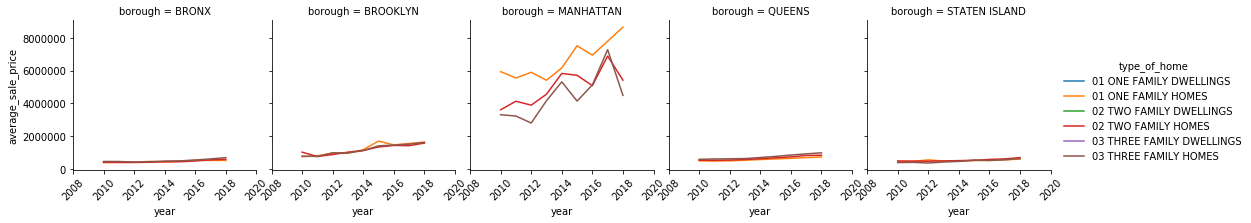

In [48]:
homeNYC = dfNYC[["borough","neighborhood","type_of_home","number_of_sales","year"]].groupby(["borough","type_of_home","year"],as_index=False).sum()

homeNYC2 = dfNYC[["borough","neighborhood","type_of_home","average_sale_price","year"]].groupby(["borough","type_of_home","year"],as_index=False).mean()
homeNYC=homeNYC.merge(homeNYC2)

grid3 = sns.FacetGrid(homeNYC, col="borough",hue="type_of_home")
grid4 = sns.FacetGrid(homeNYC, col="borough",hue="type_of_home")

grid3.map(sns.lineplot, "year", "number_of_sales")
grid4.map(sns.lineplot, "year", "average_sale_price")

grid3.set_xticklabels(rotation=45)
grid4.set_xticklabels(rotation=45)
grid3.add_legend(markerscale=3)
grid4.add_legend(markerscale=3)
plt.show()

### 2.1.3 Geospatial analysis NYC data

In [52]:
test=dfNYC.groupby("neighborhood",as_index=False).mean()
test["neighborhood"]=test["neighborhood"]


In [56]:
with open('Data/newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
ny=pd.json_normalize(newyork_data["features"])
ny.drop(["type","id","geometry.type","properties.stacked","properties.annoline2","properties.annoline3","properties.annoangle","properties.bbox"],axis=1,inplace=True)
ny['properties.name']=ny['properties.name'].str.upper()
ny=ny.merge(test[["neighborhood","average_sale_price"]],how="left",left_on="properties.name",right_on="neighborhood")

ny

geometry_name                      geometry.coordinates properties.name  \
0            geom      [-73.84720052054902, 40.89470517661]       WAKEFIELD   
1            geom   [-73.82993910812398, 40.87429419303012]      CO-OP CITY   
2            geom  [-73.82780644716412, 40.887555677350775]     EASTCHESTER   
3            geom   [-73.90564259591682, 40.89543742690383]       FIELDSTON   
4            geom   [-73.9125854610857, 40.890834493891305]       RIVERDALE   
..            ...                                       ...             ...   
301          geom   [-74.00011136202637, 40.75665808227519]    HUDSON YARDS   
302          geom   [-73.80553002968718, 40.58733774018741]         HAMMELS   
303          geom  [-73.76596781445627, 40.611321691283834]       BAYSWATER   
304          geom  [-73.94563070334091, 40.756091297094706]    QUEENSBRIDGE   
305          geom   [-74.08173992211962, 40.61731079252983]       FOX HILLS   

    properties.annoline1 properties.borough neighborhood  average_sale_price  
0              Wakefield              Bronx    WAKEFIELD        4.192124e+05  
1                  Co-op              Bronx   CO-OP CITY        4.011429e+05  
2            Eastchester              Bronx          NaN                 NaN  
3              Fieldston              Bronx    FIELDSTON        1.131654e+06  
4              Riverdale              Bronx    RIVERDALE        8.473890e+05  
..                   ...                ...          ...                 ...  
301               Hudson          Manhattan          NaN                 NaN  
302              Hammels             Queens      HAMMELS        4.115906e+05  
303            Bayswater             Queens          NaN                 NaN  
304         Queensbridge             Queens          NaN                 NaN  
305                  Fox      Staten Island          NaN                 NaN  

[306 rows x 7 columns]

In [60]:
NY_lat=40.730610
NY_long=-73.935242
from folium.plugins import MarkerCluster
sales = folium.map.FeatureGroup()

ny_map = folium.Map(location=[NY_lat, NY_long], zoom_start=10)
sales=MarkerCluster().add_to(sales)

for n in range(0,len(newyork_data["features"])):
    folium.CircleMarker([newyork_data["features"][n]["geometry"]["coordinates"][1],newyork_data["features"][n]["geometry"]["coordinates"][0]],
                  popup=newyork_data["features"][n]["properties"]["borough"]+":\n"+newyork_data["features"][n]["properties"]["name"]+",\n"+str(ny["average_sale_price"].loc[n].round(2))+" USD",
                  radius=3, # define how big you want the circle markers to be
                  fill=True,
                  fill_color='blue',
                  fill_opacity=0.5      
                 ).add_to(sales)
sales.add_to(ny_map)
ny_map

In [51]:
with open('Data/NYCneighborhoods-geojson.json') as json_data:
    geo = json.load(json_data)
    
dfnygeo=pd.json_normalize(geo["features"])
dfnygeo['properties.neighborhood'] = dfnygeo['properties.neighborhood'].str.upper()

In [53]:
dfnygeo=dfnygeo.merge(test[["neighborhood","average_sale_price"]],how="left",left_on="properties.neighborhood",right_on="neighborhood")
dfnygeo["properties.neighborhood"] =dfnygeo["properties.neighborhood"].str.title()


In [62]:
ny_geo = r'Data/NYCneighborhoods-geojson.json' #geo json for NYC

folium.Choropleth(
    geo_data=ny_geo,
    data=dfnygeo,
    columns=['properties.neighborhood', 'average_sale_price'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average house sales'
).add_to(ny_map)

# display map
ny_map